# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Chinmay Chouthai</p>
### <p style="text-align: right;"> &#9989; ChinmayNC</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [3]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    'South America': {
        'Venezuela': ['Central America', 'Brazil', 'Peru'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Brazil', 'Peru']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Northern Europe': ['Scandinavia', 'Great Britain', 'Western Europe', 'Ukraine'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'Ukraine'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'Middle East'],
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Western Europe', 'Southern Europe', 'Russia'],
        'Russia': ['Ukraine', 'Northern Europe', 'Middle East', 'China', 'Mongolia'],
        'Middle East': ['Southern Europe', 'Ukraine', 'Russia', 'India', 'Africa'],
        'Africa': ['Brazil', 'Middle East', 'North Africa', 'Egypt', 'Western Europe']
    },
    'Africa': {
        'North Africa': ['Egypt', 'Brazil', 'Western Europe', 'Central Africa', 'East Africa'],
        'Egypt': ['North Africa', 'Middle East', 'East Africa'],
        'East Africa': ['North Africa', 'Egypt', 'Central Africa', 'South Africa'],
        'Central Africa': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['East Africa', 'Central Africa']
    },
    'Asia': {
        'Kamchatka': ['Alaska', 'Mongolia', 'Japan', 'China'],
        'Mongolia': ['Kamchatka', 'Russia', 'China', 'Japan'],
        'Japan': ['Kamchatka', 'Mongolia'],
        'China': ['Kamchatka', 'Mongolia', 'Russia', 'India', 'Southeast Asia'],
        'India': ['China', 'Russia', 'Middle East'],
        'Russia': ['China', 'Mongolia', 'Ukraine', 'Kazakhstan'],
        'Southeast Asia': ['China', 'India', 'Indonesia'],
        'Indonesia': ['Southeast Asia', 'Australia'],
        'Australia': ['Indonesia']
    },
    'Australia': {
        'Australia': ['Indonesia']
    }
}



### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [4]:


def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Create an empty graph
    G = nx.Graph()
    
    # Loop through each continent and its territories
    for continent, continent_territories in territories.items():
        # Add each territory as a node with continent info
        for territory, neighbors in continent_territories.items():
            G.add_node(territory, continent=continent)
            
            # Connect the territory to its neighbors
            for neighbor in neighbors:
                # Only add the edge if it doesn't already exist
                if not G.has_edge(territory, neighbor):
                    G.add_edge(territory, neighbor)
    
    # Return the graph
    return G

# Create the graph from the territory data
G = create_risk_graph(risk_territories)

### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

Choose a layout from the following options:
1. spring
2. circular
3. kamada_kawai
4. random
5. spectral


Enter the number of your choice:  2


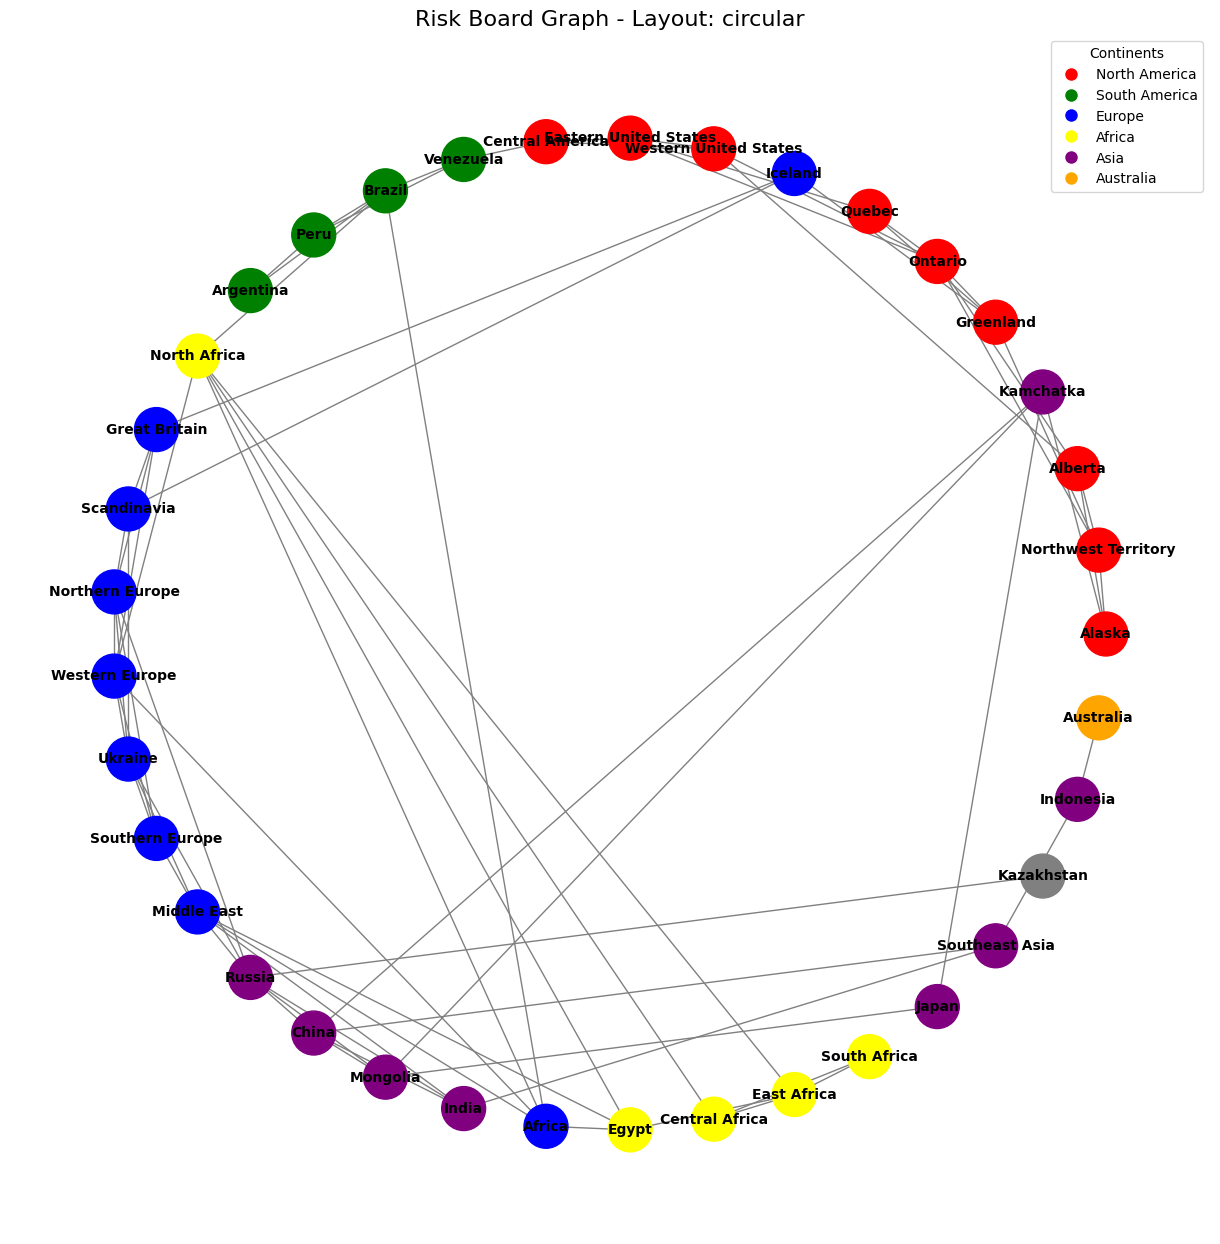

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_risk_graph(G):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
    """
    # Set layout options for the graph
    layouts = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'random': nx.random_layout,
        'spectral': nx.spectral_layout
    }
    
    # Let the user pick a layout
    print("Choose a layout from the following options:")
    for i, layout in enumerate(layouts, 1):
        print(f"{i}. {layout}")
    
    # Get the layout choice from user input
    layout_choice = int(input("Enter the number of your choice: "))
    layout_name = list(layouts.keys())[layout_choice - 1]
    
    # Apply the chosen layout
    pos = layouts[layout_name](G)
    
    # Colors for each continent
    continent_colors = {
        'North America': 'red',
        'South America': 'green',
        'Europe': 'blue',
        'Africa': 'yellow',
        'Asia': 'purple',
        'Australia': 'orange'
    }
    
    # Create a list of node colors based on the continent of each territory
    node_colors = []
    for node in G.nodes:
        continent = G.nodes[node].get('continent', 'Unknown')  # Get continent safely
        node_colors.append(continent_colors.get(continent, 'gray'))  # Default to gray if continent not found
    
    # Node size - making them bigger
    node_size = 1000
    
    # Increase font size for labels
    font_size = 10
    
    # Create the plot
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_size, font_size=font_size, font_weight='bold', edge_color='gray')
    
    # Add title to the plot
    plt.title(f"Risk Board Graph - Layout: {layout_name}", fontsize=16)
    
    # Make the legend
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=continent)
                       for continent, color in continent_colors.items()]
    plt.legend(handles=legend_elements, title="Continents")
    
    # Display the plot
    plt.show()

# Visualize the graph
visualize_risk_graph(G)


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

✎1. The Kamada-Kawai layout works best here because it arranges the nodes (territories) based on their graph-theoretic distances. This layout tries to minimize the "energy" of the graph by keeping related nodes close together, which results in continents being visually grouped. layouts = {
    'kamada_kawai': nx.kamada_kawai_layout 
} 
2.The Kamada-Kawai layout is a force-directed algorithm that places nodes in a way that the distance between nodes is close to their graph-theoretic distances. It minimizes the total energy of the graph, creating clusters that represent territories connected to each other. This algorithm essentially tries to make the graph as "nice" as possible by positioning the nodes to reflect their relationships.https://cs.brown.edu/people/rtamassi/gdhandbook/chapters/force-directed.pdf
3

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University